###### <ins>COMP-544DL - Machine Learning</ins>
## Final Project (May 2024)
### Authors: Ioannis Stathakis, Konstantinos Kostis

#

## Part 1 - Experimenting and Selecting our Model

In [1]:
# We will start with importing some initial necessary libaries and the provided csv file
# Also, we will perform some initial statistics/checks on the condition of the dataset
import numpy as np
import pandas as pd

# A simple code snippet to supress some future warnings that come up from the sklearn module
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Let's import and start checking out the dataset
data_df = pd.read_csv("train.csv")
data_df

,text,sentiment
0,I am taking Avadart and thought I would try Pr...,negative
1,It was with much amusement that I read Nicko M...,negative
2,Cate Blanchett rocked these stunning gold stat...,positive
3,Manturov: Russia and Iran may begin the paymen...,neutral
4,We bought some vintage jars at a thrift store ...,neutral
...,...,...
7995,The star who helped give a spark to `` Chasing...,negative
7996,What 's not to like about a movie with a ` chi...,positive
7997,One of the blokes spent the night in a cell in...,negative
7998,My Gucci flip-flops will make their debut on S...,neutral


In [3]:
# Let's check for duplicate entries
data_df.duplicated().sum()

5

In [4]:
# We have only 5 duplicates
# This number is completely negligible in regard to the total dataset entries
# Except for this, the model could probably benefit from as more entries as possible
# Since this is not an EDA project, the most sensible approach is probably to leave these duplicates in the dataset

In [5]:
# Let's check for null values
data_df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [6]:
# No missing values seem to be present
# Let's explore the different class values for the target variable "sentiment"
data_df["sentiment"].value_counts()

sentiment
positive    3063
neutral     2795
negative    2142
Name: count, dtype: int64

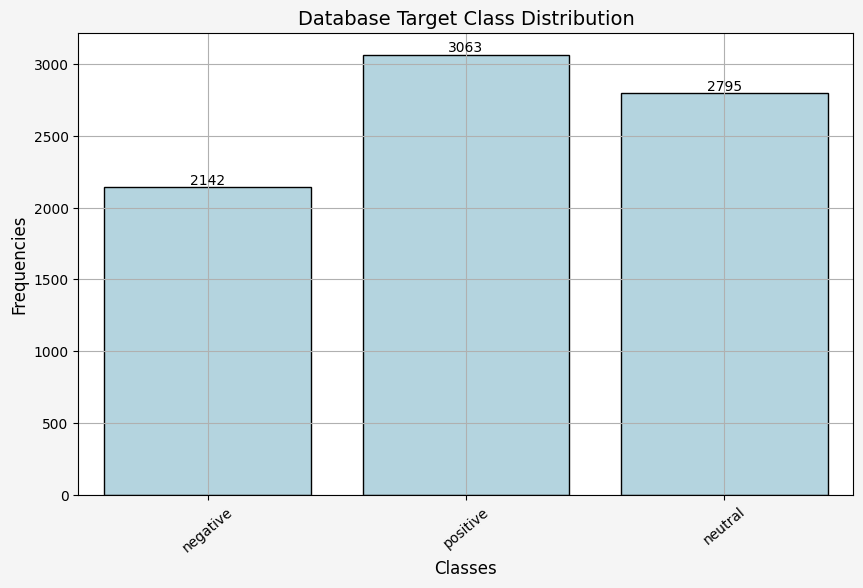

In [7]:
# Let's visualize the distribution of the three different classes using a countplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6), facecolor="whitesmoke")
ax = sns.countplot(data=data_df, x="sentiment", color="lightblue", edgecolor="black", zorder=1)
plt.title("Database Target Class Distribution", size=14)
plt.xlabel("Classes", size=12)
plt.ylabel("Frequencies", size=12)
plt.grid(zorder=0)
plt.xticks(rotation=40)
ax.bar_label(ax.containers[0])
plt.show()

### The classes don't seem to be noticeably unbalanced
### We can start experimenting with various models
### If needed, we will address the class balance at a later stage, and experiment some more

#

## <ins>General plan</ins>:
### We will use the following selection of models:
### - Multinomial Naive Bayes (MNB)
### - Complement Naive Bayes (CNB)
### - Support Vector Machine (SVM - SVC)
### - K-Nearest Neighbors (KNN)
### - Neural Network Classifier (MLP)

#

### Two main approaches for model evaluation:
### *Approach A*, in which we will use Hold-out methods, experimenting with GridSearchCV and model hyper-parameters on the way.
### *Approach B*, in which we will use Cross Validation for the same models experimentation.
### *Approach C*, addressing the slight class imbalance issue, by creating a sampled dataset of equal class frequencies.
### *Approach D*, in the spirit of *Approach C*, but using up-sampling to test whether it yields better results.

#

### We are going to use the <ins>sklearn</ins> python library, and some of its helpful models such as *Pipeline()*, *GridSearchCV()*, etc.
### For the text preprocessing we are going to use sklearn's TF-IDF Vectorizer with its native stopwords function.
### For the Hold-outs we are goind to employ the *train_test_split* method.
### Finally, for model evaluation metrics, we are going to employ sklearn's *classification_report*. 
### The report will contain assesments for the four basic metrics: *accuracy*, *precision*, *recall* and *f1-score*.
### We will also use some visualization tools for the final assesments, such as ROC-Curve, Precision-Recall Curve and Confusion Matrix.

#

### Let's get going, then!

#

## <ins>Approach A</ins> (Hold-out method)

In [8]:
# Let's start by splitting the dataset to the predictor and target variables
X = data_df["text"]
Y = data_df["sentiment"]

In [9]:
# Using the Train-Test-Split method to train and validate the models
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=19)

In [10]:
# Let's import some of the libraries/modules we are going to need
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [11]:
# Let's start with some initial basic model evaluation using pipelines for all models
# We will check out the performance using classification_report
pipelineMNB = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("clf", MultinomialNB())])
pipelineCNB = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("clf", ComplementNB())])
pipelineSVC = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("clf", SVC())])
pipelineMLP = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("clf", MLPClassifier())])
pipelineKNN = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("clf", KNeighborsClassifier())])

In [12]:
# Fitting the Multinomial Naive Bayes model with the train dataset
# Obtaining a prediction based on the test dataset
pipelineMNB.fit(X_train, Y_train)
predictionMNB = pipelineMNB.predict(X_test)

In [13]:
# Fitting the Complement Naive Bayes model with the train dataset
# Obtaining a prediction based on the test dataset
pipelineCNB.fit(X_train, Y_train)
predictionCNB = pipelineCNB.predict(X_test)

In [14]:
# Fitting the SVC model with the train dataset
# Obtaining a prediction based on the test dataset
pipelineSVC.fit(X_train, Y_train)
predictionSVC = pipelineSVC.predict(X_test)

In [15]:
# Fitting the K-Nearest Neighbors model with the train dataset
# Obtaining a prediction based on the test dataset
pipelineKNN.fit(X_train, Y_train)
predictionKNN = pipelineKNN.predict(X_test)

In [16]:
# Fitting the MLP Neural Network model with the train dataset
# Obtaining a prediction based on the test dataset
pipelineMLP.fit(X_train, Y_train)
predictionMLP = pipelineMLP.predict(X_test)

In [17]:
# Now let's obtain the assesment reports for each model
print("\nReport for the Multinomial Naive Bayes:")
print()
print(classification_report(Y_test, predictionMNB))


Report for the Multinomial Naive Bayes:

              precision    recall  f1-score   support

    negative       0.70      0.22      0.34       424
     neutral       0.57      0.46      0.51       556
    positive       0.52      0.85      0.64       620

    accuracy                           0.55      1600
   macro avg       0.60      0.51      0.50      1600
weighted avg       0.58      0.55      0.51      1600



In [18]:
print("\nReport for the Complement Naive Bayes:")
print()
print(classification_report(Y_test, predictionCNB))


Report for the Complement Naive Bayes:

              precision    recall  f1-score   support

    negative       0.59      0.50      0.54       424
     neutral       0.58      0.47      0.52       556
    positive       0.58      0.74      0.65       620

    accuracy                           0.58      1600
   macro avg       0.58      0.57      0.57      1600
weighted avg       0.58      0.58      0.58      1600



In [19]:
print("\nReport for the SVC:")
print()
print(classification_report(Y_test, predictionSVC))


Report for the SVC:

              precision    recall  f1-score   support

    negative       0.62      0.42      0.50       424
     neutral       0.55      0.54      0.54       556
    positive       0.59      0.72      0.65       620

    accuracy                           0.58      1600
   macro avg       0.58      0.56      0.56      1600
weighted avg       0.58      0.58      0.57      1600



In [20]:
print("\nReport for the K_Nearest Neighbors:")
print()
print(classification_report(Y_test, predictionKNN))


Report for the K_Nearest Neighbors:

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       424
     neutral       0.37      0.62      0.46       556
    positive       0.47      0.50      0.49       620

    accuracy                           0.41      1600
   macro avg       0.28      0.38      0.32      1600
weighted avg       0.31      0.41      0.35      1600



In [21]:
print("\nReport for the MLP Neural Network:")
print()
print(classification_report(Y_test, predictionMLP))


Report for the MLP Neural Network:

              precision    recall  f1-score   support

    negative       0.54      0.45      0.49       424
     neutral       0.49      0.49      0.49       556
    positive       0.55      0.61      0.58       620

    accuracy                           0.53      1600
   macro avg       0.53      0.52      0.52      1600
weighted avg       0.53      0.53      0.53      1600



#

### The worst performing model in general, but also accuracy-wise, seems to be the K-NN followed by the MLP Neural Network Classifier.
### The best seems to be the Complement Naive Bayes model, followed by the SVC and the Multinomial Naive Bayes.
### We will continue experimenting with these three best candidate models.

#### ***Note: We also tried to experiment with the CountVectorizer(), but it yielded weaker results. We opted for TfidfVectorizer() instead.

#

### Let's repeat the validations, this time using GridSearchCV() and some hyper-parameter tweaking.

#

In [22]:
# Let's start with preprocessing the dataset with the TF-IDF Vectorizer
# Then splitting the data using the train_test_split() function
X = data_df["text"]
Y = data_df["sentiment"]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer() # Without using stopwords

# Fit and transform the text data
X_tfidf = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.2, random_state=19)

In [23]:
# GridSearchCV() hyper-parameter tweaking for the MNB model 
# Define parameter grid for hyper-parameter tuning
param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Initialize GridSearchCV()
MNB_grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=10, scoring="accuracy")

# Perform Grid Search to find the best hyper-parameters
MNB_grid_search.fit(X_train, Y_train)

# Save the best hyper-parameters
best_alpha_MNB = MNB_grid_search.best_params_["alpha"]

# Initialize the Multinomial Naive Bayes classifier with the best hyper-parameters
MNB_Classifier = MultinomialNB(alpha=best_alpha_MNB)

# Train the MNB Classifier
MNB_Classifier.fit(X_train, Y_train)

# Make predictions on the test set
MNB_predictions = MNB_Classifier.predict(X_test)

# Evaluate the classifier
print("\nClassification Report for the Multinomial Naive Bayes using GridSearchCV():")
print()
print(classification_report(Y_test, MNB_predictions))


Classification Report for the Multinomial Naive Bayes using GridSearchCV():

              precision    recall  f1-score   support

    negative       0.56      0.47      0.51       424
     neutral       0.55      0.50      0.52       556
    positive       0.57      0.68      0.62       620

    accuracy                           0.56      1600
   macro avg       0.56      0.55      0.55      1600
weighted avg       0.56      0.56      0.56      1600



#

### We can notice an improvement to the model's assesment metrics. 
### Let's continue with the Complement Naive Bayes model.

#

In [24]:
# GridSearchCV() hyper-parameter tweaking for the CNB model 
# Define parameter grid for hyper-parameter tuning
param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Initialize GridSearchCV()
CNB_grid_search = GridSearchCV(ComplementNB(), param_grid, cv=10, scoring="accuracy")

# Perform Grid Search to find the best hyper-parameters
CNB_grid_search.fit(X_train, Y_train)

# Save the best hyper-parameters
best_alpha_CNB = CNB_grid_search.best_params_["alpha"]

# Initialize the Complement Naive Bayes classifier with the best hyper-parameters
CNB_Classifier = ComplementNB(alpha=best_alpha_CNB)

# Train the CNB Classifier
CNB_Classifier.fit(X_train, Y_train)

# Make predictions on the test set
CNB_predictions = CNB_Classifier.predict(X_test)

# Evaluate the classifier
print("\nClassification Report for the Complement Naive Bayes using GridSearchCV():")
print()
print(classification_report(Y_test, CNB_predictions))


Classification Report for the Complement Naive Bayes using GridSearchCV():

              precision    recall  f1-score   support

    negative       0.55      0.57      0.56       424
     neutral       0.59      0.47      0.52       556
    positive       0.60      0.70      0.64       620

    accuracy                           0.58      1600
   macro avg       0.58      0.58      0.57      1600
weighted avg       0.58      0.58      0.58      1600



#

### Performance of the CNB seems more or less the same, using Grid Search.
### Let's check out the SVC model as well.

#

In [25]:
# GridSearchCV() hyper-parameter tweaking for the SVC model 
# Define parameter grid for hyper-parameter tuning
param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}

# Initialize GridSearchCV()
SVC_grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring="accuracy")

# Perform Grid Search to find the best hyper-parameters
SVC_grid_search.fit(X_train, Y_train)

# Save the best hyper-parameters
best_params_SVC = SVC_grid_search.best_params_

# Initialize the SVC Classifier with the best hyper-parameters
SVC_Classifier = SVC(**best_params_SVC)

# Train the SVC Classifier
SVC_Classifier.fit(X_train, Y_train)

# Make predictions on the test set
SVC_predictions = SVC_Classifier.predict(X_test)

# Evaluate the classifier
print("\nClassification Report for the SVC model using GridSearchCV():")
print()
print(classification_report(Y_test, SVC_predictions))


Classification Report for the SVC model using GridSearchCV():

              precision    recall  f1-score   support

    negative       0.64      0.51      0.57       424
     neutral       0.56      0.58      0.57       556
    positive       0.64      0.70      0.67       620

    accuracy                           0.61      1600
   macro avg       0.61      0.60      0.60      1600
weighted avg       0.61      0.61      0.61      1600



In [26]:
# Let's check out what were the best parameters for each models, resulting from the Grid Search

print("\nThe best alpha for the Multinomial Naive Bayes model was: alpha =", best_alpha_MNB)
print("\nThe best alpha for the Complement Naive Bayes model was: alpha =", best_alpha_CNB)
print("\nThe best parameters for the SVC model were:", best_params_SVC)


The best alpha for the Multinomial Naive Bayes model was: alpha = 0.1

The best alpha for the Complement Naive Bayes model was: alpha = 0.5

The best parameters for the SVC model were: {'C': 10, 'kernel': 'rbf'}


#

#### ***Note 1: Grid Search for the SVC model was tried with Cross Validation parameter of 3, 5 and 10 folds.
#### However, the 3-fold CV gave the same results as the 5-fold one, and the 10-fold CV proved to be extremely time consuming.
#### For the sake of simplicity, the 3-fold CV seemed to be the most reasonable choice.
#### Moreover, another hyper-parameter was also included in the Grid Search, initially, namely the kernel coefficient "gamma".
#### The gamma values we used for the evaluation were [0.001, 0.01, 0.1, 1].
#### The regularization parameter C was initially explored for the values [0.1, 1, 10, 100].
#### This initial Grid Search returned C=10, gamma=1, and RBF kernel as the best hyper-parameters.
#### However, the resulting classification report was absolutely identical with Grid Search using only C and kernel as parameters, for all metrics returned.
#### Therefore, since the initial Grid Search proved really time consuming (took about 30 minutes), I opted to include a "short" version, using only C and kernel as parameters, for simplicity, once again.

#

#### ***Note 2: The above three validations using GridSearchCV were initially performed using the stop_words parameter of the TfidfVectorizer() set to "english".
#### However the results of the metrics were actually weaker, so I kept these trials were I just let the stop_words parameter default to "none".

#

### Examination of all classification reports for the three candidate models, using Grid Search, shows that for now the best performing model is the SVC with regularization parameter C=10 and RBF kernel.

### This model has achieved the highest Accuracy so far (0.61), as well as better overall values for the rest of the metrics (Precision, Recall, F1-Score), compared to the other models. Also, it showed the most promising improvement through the use of Grid Search.

### Let's proceed with trying separate Cross Validation (10-fold) for these three best peforming models, to see if we notice any differences.

#

## <ins>Approach B</ins> (Cross Validation)

In [27]:
# Importing some necessary libraries/modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
# Let's start with the Multinomial Naive Bayes once again
accuracy_MNB = cross_val_score(pipelineMNB, data_df["text"], data_df["sentiment"], cv=10, scoring="accuracy").mean()
precision_MNB = cross_val_score(pipelineMNB, data_df["text"], data_df["sentiment"], cv=10, scoring="precision_macro").mean()
recall_MNB = cross_val_score(pipelineMNB, data_df["text"], data_df["sentiment"], cv=10, scoring="recall_macro").mean()
f1_MNB = cross_val_score(pipelineMNB, data_df["text"], data_df["sentiment"], cv=10, scoring="f1_macro").mean()

In [29]:
# Store the results in a list/dataframe, to be used for printing 
MNB_results = [(accuracy_MNB, precision_MNB, recall_MNB, f1_MNB)]
MNB_results_df = pd.DataFrame(MNB_results, columns=["Accuracy", "Precision", "Recall", "F1 Measure"])
MNB_results_df = MNB_results_df.set_index(pd.Index(["Values"]))

In [30]:
# Let's print the results for the MNB model
print("\nThe MNB Model results are the following:")
print()
print(MNB_results_df)


The MNB Model results are the following:

        Accuracy  Precision    Recall  F1 Measure
Values  0.547625   0.595884  0.514292    0.502319


#

In [31]:
# Let's repeat for the Complement Naive Bayes model
accuracy_CNB = cross_val_score(pipelineCNB, data_df["text"], data_df["sentiment"], cv=10, scoring="accuracy").mean()
precision_CNB = cross_val_score(pipelineCNB, data_df["text"], data_df["sentiment"], cv=10, scoring="precision_macro").mean()
recall_CNB = cross_val_score(pipelineCNB, data_df["text"], data_df["sentiment"], cv=10, scoring="recall_macro").mean()
f1_CNB = cross_val_score(pipelineCNB, data_df["text"], data_df["sentiment"], cv=10, scoring="f1_macro").mean()

In [32]:
# Store the results in a list/dataframe, to be used for printing 
CNB_results = [(accuracy_CNB, precision_CNB, recall_CNB, f1_CNB)]
CNB_results_df = pd.DataFrame(CNB_results, columns=["Accuracy", "Precision", "Recall", "F1 Measure"])
CNB_results_df = CNB_results_df.set_index(pd.Index(["Values"]))

In [33]:
# Let's print the results for the CNB model
print("\nThe CNB Model results are the following:")
print()
print(CNB_results_df)


The CNB Model results are the following:

        Accuracy  Precision    Recall  F1 Measure
Values  0.577375   0.577826  0.568218    0.567771


#

In [34]:
# Let's repeat for the Linear SVC model
accuracy_SVC = cross_val_score(pipelineSVC, data_df["text"], data_df["sentiment"], cv=10, scoring="accuracy").mean()
precision_SVC = cross_val_score(pipelineSVC, data_df["text"], data_df["sentiment"], cv=10, scoring="precision_macro").mean()
recall_SVC = cross_val_score(pipelineSVC, data_df["text"], data_df["sentiment"], cv=10, scoring="recall_macro").mean()
f1_SVC = cross_val_score(pipelineSVC, data_df["text"], data_df["sentiment"], cv=10, scoring="f1_macro").mean()

In [35]:
# Store the results in a list/dataframe, to be used for printing 
SVC_results = [(accuracy_SVC, precision_SVC, recall_SVC, f1_SVC)]
SVC_results_df = pd.DataFrame(SVC_results, columns=["Accuracy", "Precision", "Recall", "F1 Measure"])
SVC_results_df = SVC_results_df.set_index(pd.Index(["Values"]))

In [36]:
# Let's print the results for the SVC model
print("\nThe SVC Model results are the following:")
print()
print(SVC_results_df)


The SVC Model results are the following:

        Accuracy  Precision    Recall  F1 Measure
Values  0.576125   0.581976  0.561108    0.564108


#

### None of the models show any performance improvement using this approach and settings.
### The best performer is still the SVC model with regularization parameter C=10 and RBF kernel.

#

### Let's try the third approach mentioned in the introduction, *Approach C*.
### We will sample the data randomly, just taking 2000 entries from each class, so that the classes are completely balanced, and proceed with the Grid Search approach once again, this time on the sampled dataset.

#

## <ins>Approach C</ins> (Grid Search on sampled data - Randomly Balanced Classes)

In [37]:
# Try fitting the models with a sampled dataframe so that we have completely balanced initial data
# Let's create a sample-dataframe with 2000 entries from each sentiment class
# Start by splitting the inital data into 3 dataframes according to sentiment class
positive_df = data_df[data_df["sentiment"]=="positive"].reset_index(drop=True)
negative_df = data_df[data_df["sentiment"]=="negative"].reset_index(drop=True)
neutral_df = data_df[data_df["sentiment"]=="neutral"].reset_index(drop=True)

In [38]:
# Now take the sample (n=2000)
pos_sample = positive_df.sample(2000, random_state=19)
neg_sample = negative_df.sample(2000, random_state=19)
neut_sample = neutral_df.sample(2000, random_state=19)

In [39]:
# Create a new sample dataframe and verify the class balance
sample_df = pd.concat([pos_sample, neg_sample, neut_sample]).reset_index(drop=True)
sample_df["sentiment"].value_counts()

sentiment
positive    2000
negative    2000
neutral     2000
Name: count, dtype: int64

In [40]:
sample_df

,text,sentiment
0,Moments of delight but somehow missing the qui...,positive
1,Ed Sheeran either Jan 30 2013 or Nov 1 2013 th...,positive
2,Manages to be both hugely entertaining and upl...,positive
3,"As Janice , Eileen Walsh , an engaging , wide-...",positive
4,"I liked the movie , but I know I would have li...",positive
...,...,...
5995,"@Logatron98 gucci, is the comp paper due tomor...",neutral
5996,This book is about a young boy who lives in En...,neutral
5997,One of those based-on-truth stories that persu...,neutral
5998,Curtis ties it midway thru 1st half,neutral


In [41]:
# Let's start again with preprocessing the sampled dataset with the TF-IDF Vectorizer
# Then splitting the data using the train_test_split() function
X = sample_df["text"]
Y = sample_df["sentiment"]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.2, random_state=19)

In [42]:
# GridSearchCV() hyper-parameter tweaking for the MNB model on the sampled data
# Define parameter grid for hyper-parameter tuning
param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Initialize GridSearchCV()
MNB_grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=10, scoring="accuracy")

# Perform Grid Search to find the best hyper-parameters
MNB_grid_search.fit(X_train, Y_train)

# Save the best hyper-parameters
best_alpha_MNB = MNB_grid_search.best_params_["alpha"]

# Initialize the Multinomial Naive Bayes classifier with the best hyper-parameters
MNB_Classifier = MultinomialNB(alpha=best_alpha_MNB)

# Train the MNB Classifier
MNB_Classifier.fit(X_train, Y_train)

# Make predictions on the test set
MNB_predictions = MNB_Classifier.predict(X_test)

# Evaluate the classifier
print("\nClassification Report for the Multinomial Naive Bayes using GridSearchCV() on the sampled dataset:")
print()
print(classification_report(Y_test, MNB_predictions))


Classification Report for the Multinomial Naive Bayes using GridSearchCV() on the sampled dataset:

              precision    recall  f1-score   support

    negative       0.56      0.73      0.64       399
     neutral       0.58      0.41      0.48       406
    positive       0.60      0.60      0.60       395

    accuracy                           0.58      1200
   macro avg       0.58      0.58      0.57      1200
weighted avg       0.58      0.58      0.57      1200



#

### The Multinomial Naive Bayes model seems to be performing slightly better, on the sampled dataset.
### Let's proceed to the Complement Naive Bayes.

#

In [43]:
# GridSearchCV() hyper-parameter tweaking for the CNB model on the sampled dataset
# Define parameter grid for hyper-parameter tuning
param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Initialize GridSearchCV()
CNB_grid_search = GridSearchCV(ComplementNB(), param_grid, cv=10, scoring="accuracy")

# Perform Grid Search to find the best hyper-parameters
CNB_grid_search.fit(X_train, Y_train)

# Save the best hyper-parameters
best_alpha_CNB = CNB_grid_search.best_params_["alpha"]

# Initialize the Complement Naive Bayes classifier with the best hyper-parameters
CNB_Classifier = ComplementNB(alpha=best_alpha_CNB)

# Train the MNB Classifier
CNB_Classifier.fit(X_train, Y_train)

# Make predictions on the test set
CNB_predictions = CNB_Classifier.predict(X_test)

# Evaluate the classifier
print("\nClassification Report for the Complement Naive Bayes using GridSearchCV() on the sampled dataset:")
print()
print(classification_report(Y_test, CNB_predictions))


Classification Report for the Complement Naive Bayes using GridSearchCV() on the sampled dataset:

              precision    recall  f1-score   support

    negative       0.55      0.77      0.64       399
     neutral       0.59      0.37      0.46       406
    positive       0.59      0.57      0.58       395

    accuracy                           0.57      1200
   macro avg       0.58      0.57      0.56      1200
weighted avg       0.58      0.57      0.56      1200



#

### The CNB model also shows similar pattern of performance as the MNB, but slightly worse, on the sampled dataset.
### Let's proceed to the SVC model.

#

In [44]:
# GridSearchCV() hyper-parameter tweaking for the SVC model on the sampled dataset
# Define parameter grid for hyper-parameter tuning
param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}

# Initialize GridSearchCV()
SVC_grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring="accuracy")

# Perform Grid Search to find the best hyper-parameters
SVC_grid_search.fit(X_train, Y_train)

# Save the best hyper-parameters
best_params_SVC = SVC_grid_search.best_params_

# Initialize the SVC Classifier with the best hyper-parameters
SVC_Classifier = SVC(**best_params_SVC)

# Train the MNB Classifier
SVC_Classifier.fit(X_train, Y_train)

# Make predictions on the test set
SVC_predictions = SVC_Classifier.predict(X_test)

# Evaluate the classifier
print("\nClassification Report for the SVC model using GridSearchCV():")
print()
print(classification_report(Y_test, SVC_predictions))


Classification Report for the SVC model using GridSearchCV():

              precision    recall  f1-score   support

    negative       0.59      0.68      0.63       399
     neutral       0.55      0.49      0.52       406
    positive       0.60      0.58      0.59       395

    accuracy                           0.58      1200
   macro avg       0.58      0.58      0.58      1200
weighted avg       0.58      0.58      0.58      1200



In [45]:
# Let's check out what were the best parameters for each models, resulting from the Grid Search

print("\nThe best alpha for the Multinomial Naive Bayes model was: alpha =", best_alpha_MNB)
print("\nThe best alpha for the Complement Naive Bayes model was: alpha =", best_alpha_CNB)
print("\nThe best parameters for the SVC model were:", best_params_SVC)


The best alpha for the Multinomial Naive Bayes model was: alpha = 1.0

The best alpha for the Complement Naive Bayes model was: alpha = 5.0

The best parameters for the SVC model were: {'C': 1, 'kernel': 'linear'}


#

### The SVC is performing worse.
### We notice that none of the models seem to be performing considerably better, on the randomly down-sampled dataset.

#### ***Note: Once again, I also tried these evaluations using stopwords during the initialization of the TfidfVectorizer(), but the models seemed to be performing worse, overall.
#### It seemed reasonable to let the stop_words parameter initialize to "none", in this case as well.

#

## <ins>Approach D</ins> (Up-sampling the three classes)

In [46]:
# We will use the resample module for this approach
# The idea is to "populate" the lower-frequency classes with more entries, until their frequencies are equal to the majority class
# This will help the model not only with completely balanced classes, but also with more data
from sklearn.utils import resample

# Designate the minority/majority classes
minority_class1 = data_df[data_df['sentiment'] == 'negative']

minority_class2 = data_df[data_df['sentiment'] == 'neutral']

majority_class = data_df[data_df['sentiment'] == 'positive']

In [47]:
# Upsample the minority classes
minority1_upsampled = resample(minority_class1, replace=True, n_samples=len(majority_class), random_state=12)

minority2_upsampled = resample(minority_class2, replace=True, n_samples=len(majority_class), random_state=12)

In [48]:
# Combine the upsampled minority classes with the majority class
balanced_data = pd.concat([majority_class, minority1_upsampled, minority2_upsampled])
balanced_data.reset_index(drop = True, inplace = True)
balanced_data

,text,sentiment
0,Cate Blanchett rocked these stunning gold stat...,positive
1,"I may need to fact check, but I'm pretty sure ...",positive
2,I love all of David Handler's books. . . the H...,positive
3,Tomorrow is Thor's Day. He's allowed on the te...,positive
4,I have had expensive blow dryers but after res...,positive
...,...,...
9184,I've heard that any movie in which the star di...,neutral
9185,Yoga for Anxiety coming up - join me on the 18...,neutral
9186,If Kim Kardashian and Kris Jenner were in Frea...,neutral
9187,#100Facts 76. I didn't know Kim Kardashian w...,neutral


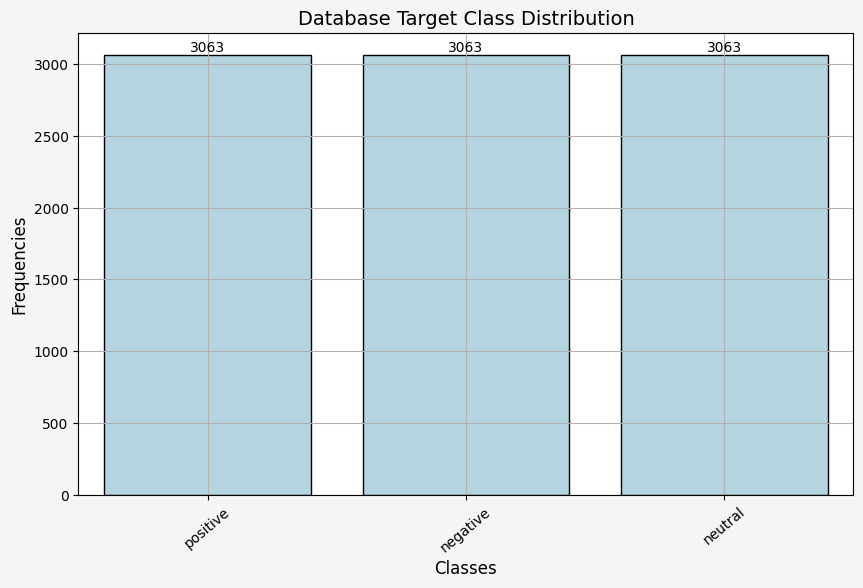

In [49]:
# Let's vosually check out the classes distribution once again
plt.figure(figsize=(10,6), facecolor="whitesmoke")
ax = sns.countplot(data=balanced_data, x="sentiment", color="lightblue", edgecolor="black", zorder=1)
plt.title("Database Target Class Distribution", size=14)
plt.xlabel("Classes", size=12)
plt.ylabel("Frequencies", size=12)
plt.grid(zorder=0)
plt.xticks(rotation=40)
ax.bar_label(ax.containers[0])
plt.show()

In [50]:
# Let's start with preprocessing the dataset before with the TF-IDF Vectorizer
# We will also use a custom function to remove url elements from the text
import re
import string

#Function to remove urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r"", text)

balanced_data["text"] = balanced_data["text"].apply(lambda text: remove_urls(text))

X = balanced_data["text"]
Y = balanced_data["sentiment"]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer() # Without using stopwords, this seems to yield the best results

# Fit and transform the text data
X_tfidf = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.2, random_state=19)

In [51]:
# GridSearchCV() hyper-parameter tweaking for the MNB model 
# Define parameter grid for hyper-parameter tuning
param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Initialize GridSearchCV()
MNB_grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=10, scoring="accuracy")

# Perform Grid Search to find the best hyper-parameters
MNB_grid_search.fit(X_train, Y_train)

# Save the best hyper-parameters
best_alpha_MNB = MNB_grid_search.best_params_["alpha"]

# Initialize the Multinomial Naive Bayes classifier with the best hyper-parameters
MNB_Classifier = MultinomialNB(alpha=best_alpha_MNB)

# Train the MNB Classifier
MNB_Classifier.fit(X_train, Y_train)

# Make predictions on the test set
MNB_predictions = MNB_Classifier.predict(X_test)

# Evaluate the classifier
print("\nClassification Report for the Multinomial Naive Bayes using GridSearchCV():")
print()
print(classification_report(Y_test, MNB_predictions))


Classification Report for the Multinomial Naive Bayes using GridSearchCV():

              precision    recall  f1-score   support

    negative       0.75      0.85      0.80       621
     neutral       0.75      0.71      0.73       632
    positive       0.73      0.68      0.70       585

    accuracy                           0.75      1838
   macro avg       0.75      0.75      0.74      1838
weighted avg       0.75      0.75      0.75      1838



#

### We can notice a considerable improvement on this model's metrics, compared to all approaches so far.
### Let's proceed with the other two models in this approach.

#

In [52]:
# GridSearchCV() hyper-parameter tweaking for the CNB model 
# Define parameter grid for hyper-parameter tuning
param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Initialize GridSearchCV()
CNB_grid_search = GridSearchCV(ComplementNB(), param_grid, cv=10, scoring="accuracy")

# Perform Grid Search to find the best hyper-parameters
CNB_grid_search.fit(X_train, Y_train)

# Save the best hyper-parameters
best_alpha_CNB = CNB_grid_search.best_params_["alpha"]

# Initialize the Complement Naive Bayes classifier with the best hyper-parameters
CNB_Classifier = ComplementNB(alpha=best_alpha_CNB)

# Train the CNB Classifier
CNB_Classifier.fit(X_train, Y_train)

# Make predictions on the test set
CNB_predictions = CNB_Classifier.predict(X_test)

# Evaluate the classifier
print("\nClassification Report for the Complement Naive Bayes using GridSearchCV():")
print()
print(classification_report(Y_test, CNB_predictions))


Classification Report for the Complement Naive Bayes using GridSearchCV():

              precision    recall  f1-score   support

    negative       0.73      0.86      0.79       621
     neutral       0.75      0.70      0.72       632
    positive       0.73      0.64      0.68       585

    accuracy                           0.74      1838
   macro avg       0.74      0.74      0.73      1838
weighted avg       0.74      0.74      0.73      1838



In [53]:
# GridSearchCV() hyper-parameter tweaking for the SVC model 
# Define parameter grid for hyper-parameter tuning
param_grid = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]} 

# Initialize GridSearchCV()
SVC_grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring="accuracy") 

# Perform Grid Search to find the best hyper-parameters
SVC_grid_search.fit(X_train, Y_train)

# Save the best hyper-parameters
best_params_SVC = SVC_grid_search.best_params_

# Initialize the SVC Classifier with the best hyper-parameters
SVC_Classifier = SVC(**best_params_SVC) 

# Train the SVC Classifier
SVC_Classifier.fit(X_train, Y_train)

# Make predictions on the test set
SVC_predictions = SVC_Classifier.predict(X_test)

# Evaluate the classifier
print("\nClassification Report for the SVC model using GridSearchCV():")
print()
print(classification_report(Y_test, SVC_predictions))


Classification Report for the SVC model using GridSearchCV():

              precision    recall  f1-score   support

    negative       0.84      0.85      0.85       621
     neutral       0.84      0.76      0.80       632
    positive       0.74      0.81      0.78       585

    accuracy                           0.81      1838
   macro avg       0.81      0.81      0.81      1838
weighted avg       0.81      0.81      0.81      1838



In [54]:
# Let's check out what were the best parameters for each models, resulting from the Grid Search
print("\nThe best alpha for the Multinomial Naive Bayes model was: alpha =", best_alpha_MNB)
print("\nThe best alpha for the Complement Naive Bayes model was: alpha =", best_alpha_CNB)
print("\nThe best parameters for the SVC model were:", best_params_SVC)


The best alpha for the Multinomial Naive Bayes model was: alpha = 0.1

The best alpha for the Complement Naive Bayes model was: alpha = 0.1

The best parameters for the SVC model were: {'C': 10, 'kernel': 'rbf'}


#

### We can conclude that the best performing model is the SVC, trained on the balanced up-sampled dataset.
### This is obviously going to be our choice, with parameters C=10 and RBF kernel.

#

### Let's use some visual metrics for the top three performing models.
### We will create ROC-Curves, Precision-Recall Curves and Confusion Matrices for the MNB, CNB and SVC using the best hyper-parameters returned from the Grid Search performed earlier.
### To do this, we will use the scikitplot module of the sklearn library.

#

In [55]:
# Let's import the necessary libraries
import scikitplot as skplt
import matplotlib.pyplot as plt

In [56]:
# Use the balanced up-sampled dataset
X = balanced_data["text"]
Y = balanced_data["sentiment"]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer() # Without using stopwords, this seems to yield the best results

# Fit and transform the text data
X_tfidf = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.2, random_state=19)

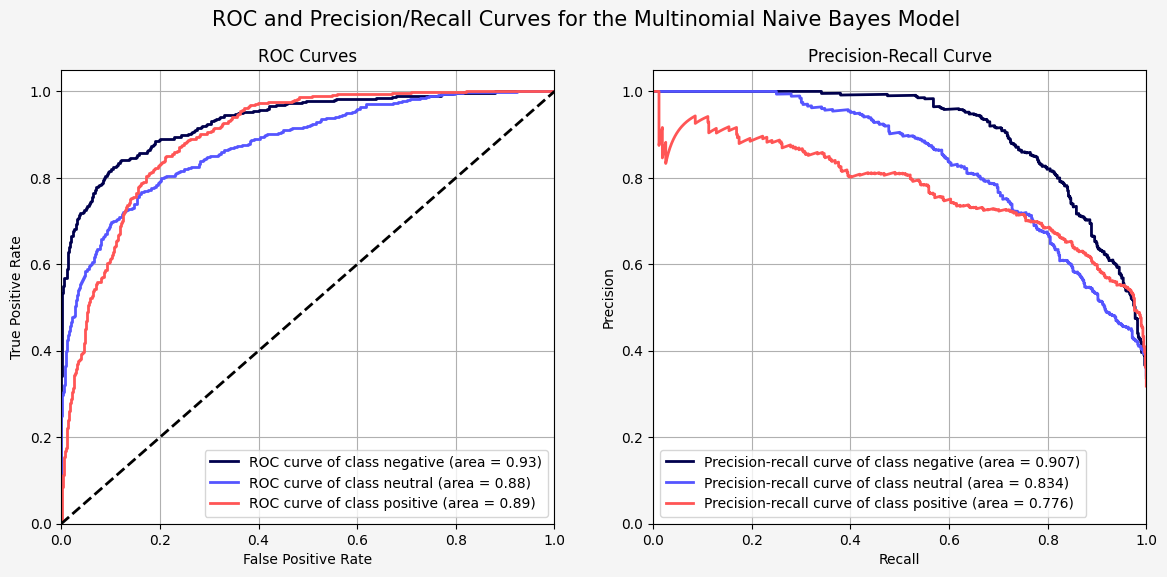

In [57]:
# Let's start with the Multinomial Naive Bayes model, with alpha=0.1
best_MNB = MultinomialNB(alpha=0.1)

# Fitting the Multinomial Naive Bayes model with the train dataset
# Obtaining a prediction based on the test dataset
best_MNB.fit(X_train, Y_train)
prediction_MNB = best_MNB.predict(X_test)

# Obtaining predictions required to be used in the scikitplot method
Y_probas = best_MNB.predict_proba(X_test)

fig = plt.figure(figsize = (14,6), facecolor="whitesmoke")
fig.subplots_adjust(top=1.85, wspace=0.2, hspace=0.3)
fig.suptitle("ROC and Precision/Recall Curves for the Multinomial Naive Bayes Model", size=15, y=1.95)

ax1 = fig.add_subplot(2, 2, 1)
skplt.metrics.plot_roc(Y_test, Y_probas, plot_micro=False, plot_macro=False, cmap="seismic", ax=ax1)
plt.grid(zorder=0)

ax2 = fig.add_subplot(2, 2, 2)
skplt.metrics.plot_precision_recall(Y_test, Y_probas, plot_micro=False, cmap="seismic", ax=ax2)
plt.grid(zorder=0)

plt.show()

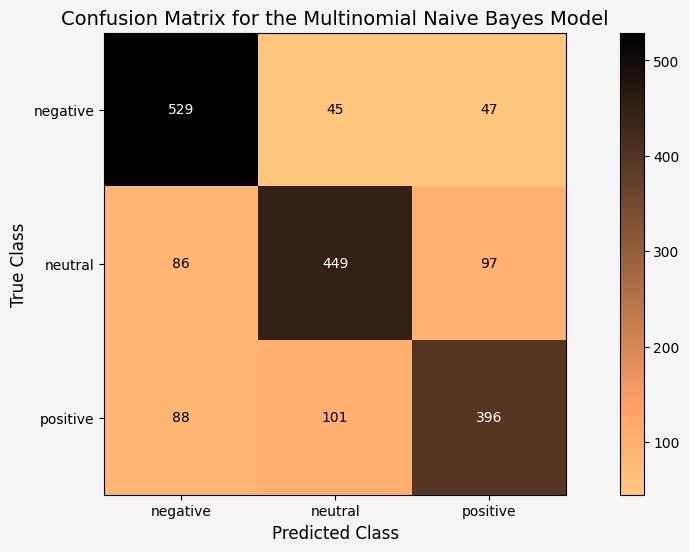

In [58]:
# Confusion Matric for the MNB Model
fig, ax = plt.subplots(figsize = (14,6), facecolor="whitesmoke")
skplt.metrics.plot_confusion_matrix(Y_test, prediction_MNB, normalize=False, cmap="copper_r", ax=ax)
ax.set_title("Confusion Matrix for the Multinomial Naive Bayes Model", size=14)
ax.set_xlabel("Predicted Class", size=12)
ax.set_ylabel("True Class", size=12)

plt.show()

#

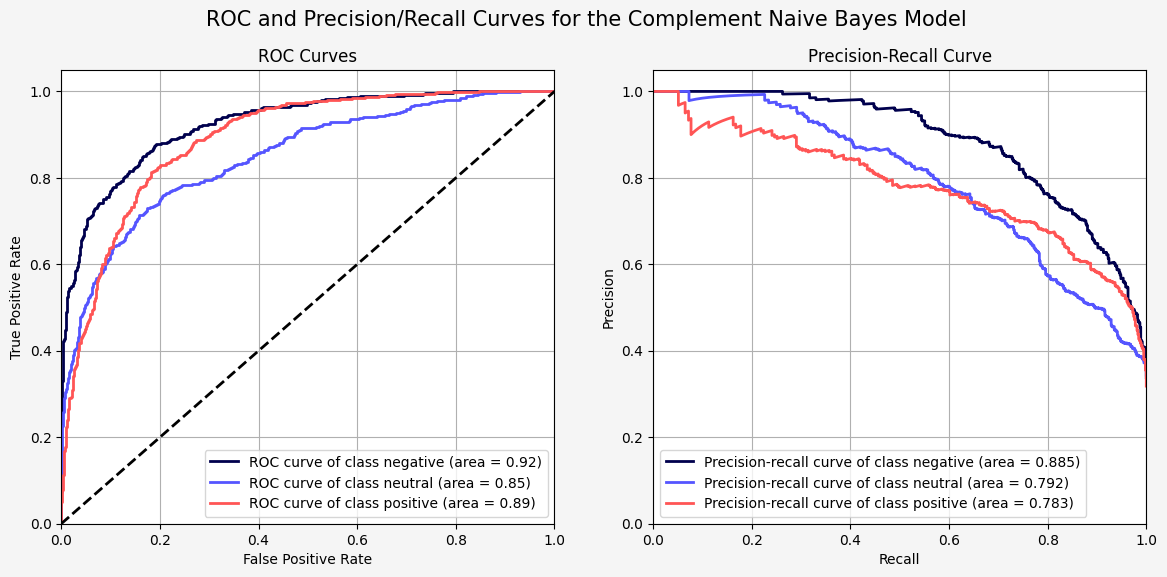

In [59]:
# Let's proceed with the Complement Naive Bayes model, with alpha=1.0
best_CNB = ComplementNB(alpha=1.0)

# Fitting the Complement Naive Bayes model with the train dataset
# Obtaining a prediction based on the test dataset
best_CNB.fit(X_train, Y_train)
prediction_CNB = best_CNB.predict(X_test)

# Obtaining predictions required to be used in the scikitplot method
Y_probas = best_CNB.predict_proba(X_test)

fig = plt.figure(figsize = (14,6), facecolor="whitesmoke")
fig.subplots_adjust(top=1.85, wspace=0.2, hspace=0.3)
fig.suptitle("ROC and Precision/Recall Curves for the Complement Naive Bayes Model", size=15, y=1.95)

ax1 = fig.add_subplot(2, 2, 1)
skplt.metrics.plot_roc(Y_test, Y_probas, plot_micro=False, plot_macro=False, cmap="seismic", ax=ax1)
plt.grid(zorder=0)

ax2 = fig.add_subplot(2, 2, 2)
skplt.metrics.plot_precision_recall(Y_test, Y_probas, plot_micro=False, cmap="seismic", ax=ax2)
plt.grid(zorder=0)

plt.show()

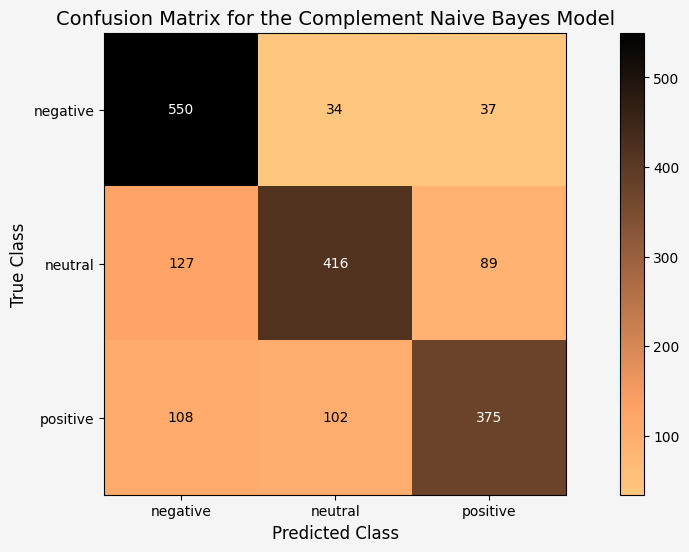

In [60]:
# Confusion Matric for the CNB Model
fig, ax = plt.subplots(figsize = (14,6), facecolor="whitesmoke")
skplt.metrics.plot_confusion_matrix(Y_test, prediction_CNB, normalize=False, cmap="copper_r", ax=ax)
ax.set_title("Confusion Matrix for the Complement Naive Bayes Model", size=14)
ax.set_xlabel("Predicted Class", size=12)
ax.set_ylabel("True Class", size=12)

plt.show()

#

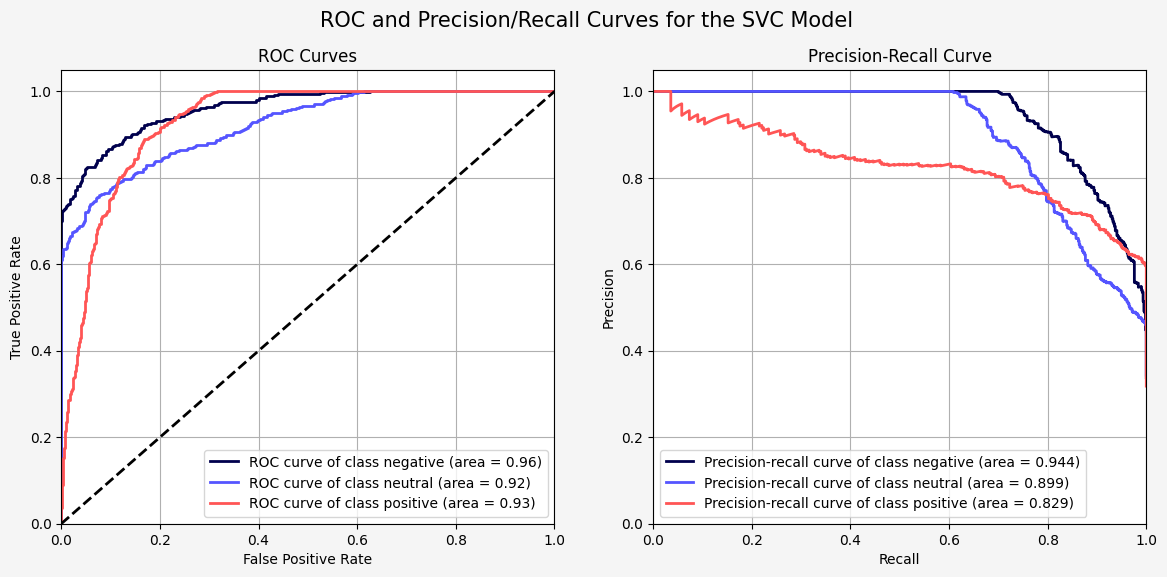

In [61]:
# Let's proceed with the SVC model, with C=10 and RBF kernel
best_SVC = SVC(C=10, kernel="rbf", probability=True)

# Fitting the SVC model with the train dataset
# Obtaining a prediction based on the test dataset
best_SVC.fit(X_train, Y_train)
prediction_SVC = best_SVC.predict(X_test)

# Obtaining predictions required to be used in the scikitplot method
Y_probas = best_SVC.predict_proba(X_test)

fig = plt.figure(figsize = (14,6), facecolor="whitesmoke")
fig.subplots_adjust(top=1.85, wspace=0.2, hspace=0.3)
fig.suptitle("ROC and Precision/Recall Curves for the SVC Model", size=15, y=1.95)

ax1 = fig.add_subplot(2, 2, 1)
skplt.metrics.plot_roc(Y_test, Y_probas, plot_micro=False, plot_macro=False, cmap="seismic", ax=ax1)
plt.grid(zorder=0)

ax2 = fig.add_subplot(2, 2, 2)
skplt.metrics.plot_precision_recall(Y_test, Y_probas, plot_micro=False, cmap="seismic", ax=ax2)
plt.grid(zorder=0)

plt.show()

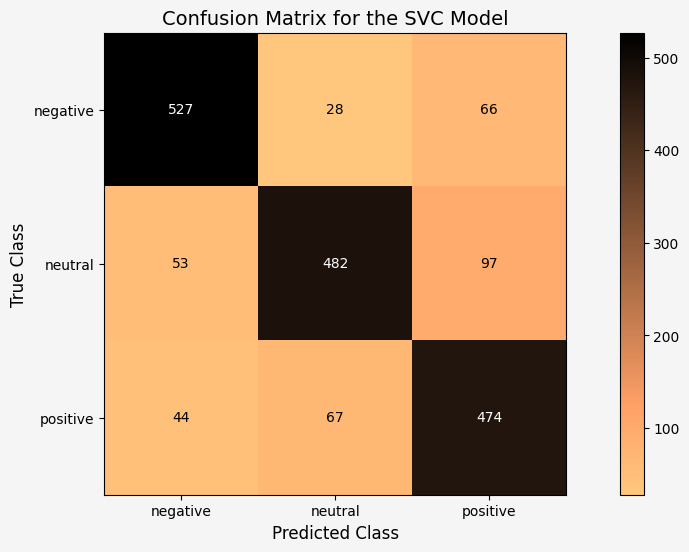

In [62]:
# Confusion Matric for the SVC Model
fig, ax = plt.subplots(figsize = (14,6), facecolor="whitesmoke")
skplt.metrics.plot_confusion_matrix(Y_test, prediction_SVC, normalize=False, cmap="copper_r", ax=ax)
ax.set_title("Confusion Matrix for the SVC Model", size=14)
ax.set_xlabel("Predicted Class", size=12)
ax.set_ylabel("True Class", size=12)

plt.show()

#

### ROC-Curves, Precision-Recall curves and Confusion Matrices visually confirm the previous results.
### Areas under the ROC and Precision/Recall curves are greater with the SVC model.
### Moreover, Confusion Matrices show that the SVC is considerably more accurate in all three classes, than the other two.
### The SVC model with the selected hyper-parameters (C=10, RBF kernel), and trained on the up-sampled dataset seems to out-perform the other two models, and on all three classes of the sentiment variable (positive, neutral, negative).
### This model with these settings will be our final selection for Part 2 of the project.

#

### We will close this part with a quick small random test, of this model and settings.

In [79]:
# Let's try a quick manual test
# Start by creating some random text/comments (n=50)
text = ["This product is terrible, I would never buy it again.", "Manturov: Russia and Iran may begin the payments in national currencies.",
        "It follows the basic plot trajectory of nearly every Schwarzenegger film : Someone crosses Arnie.", "The service at this restaurant was awful, I won't be going back.",
        "My 4th account is gonna be blocked now, what to do?? Create the 5th?! It's the craziest voting I've ever seen in my life #MTVStars Lady Gaga", 
        "Selling a ticket for Twilight Sad at the Barrowlands this Saturday (Face value) https://gimme.com.",
        "I'm extremely disappointed with the quality of this item.", "The staff at this hotel were very friendly and helpful.",
        "I don't have any strong feelings about this book, it was okay.", "The food at this restaurant was delicious, I'll definitely be returning.",
        "The customer service was prompt and efficient, I'm very satisfied.", "The quality of this product is excellent, worth every penny.",
        "I found the user interface of this app confusing and difficult to navigate.", "The performance of this computer is impressive, it's lightning fast.",
        "The packaging of this item was damaged when it arrived, disappointing.", "The acting in this movie was superb, really brought the characters to life.",
        "The instructions for assembling this furniture were clear and easy to follow.", "The delivery was delayed, causing inconvenience.",
        "The design of this website is outdated and unappealing.", "The flavor of this dish was bland, lacking seasoning.",
        "The customer support team was knowledgeable and helpful.", "The texture of this food was unpleasant, I couldn't finish it.",
        "The shipping was fast and the item arrived in perfect condition.", "The writing style of this author is engaging and captivating.",
        "I'm very disappointed with the customer service, they were unhelpful.", "The price of this product is too high for the quality.",
        "The interface of this app is cluttered and confusing.", "The delivery was delayed but the product arrived intact.",
        "The sound quality of this speaker is mediocre, it lacks bass.", "The customer service representative was rude and unprofessional.",
        "The picture quality of this TV is excellent, crisp and clear.", "The color of this dress is vibrant and eye-catching.",
        "The taste of this coffee is rich and bold, just how I like it.", "The customer service agent was polite and attentive to my needs.",
        "The functionality of this software is top-notch, very impressed.", "The layout of this magazine is modern and visually appealing.",
        "The battery life of this phone is impressive, lasts all day.", "The fit of these shoes is perfect, very comfortable to wear.",
        "The organization of this event was flawless, everything went smoothly.", "The ambiance of this café is cozy and inviting, perfect for relaxing.",
        "The customer experience at this store was exceptional, I'll definitely return.", "The scent of this candle is delightful, fills the room with a pleasant aroma.",
        "The ease of use of this app makes it my go-to for organizing my tasks.", "The customer support team went above and beyond to resolve my issue.",
        "The comfort of this mattress is unmatched, I have never slept better.", "The taste of this pizza is nothing out of the ordinary.",
        "The user interface of this website is intuitive and easy to navigate.", " Earnest but heavy-handed",
        "The quality of this painting is outstanding, it looks even better in person.", "The symbols float like butterflies and the spinning styx sting like bees."]

# Save the true class labels of the comments
true_labels = ['negative', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'negative', 'positive', 'neutral', 'positive',
          'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative',
          'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative',
          'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive',
          'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'neutral']

In [80]:
# Use our balanced dataset to fit the model
# Also using the custom function for the url elements removal
# (This will also be used on the test data)
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r"", text)

balanced_data["text"] = balanced_data["text"].apply(lambda text: remove_urls(text))

X = balanced_data["text"]
Y = balanced_data["sentiment"]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer() # Without using stopwords

# Fit and transform the text data
X_tfidf = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.2, random_state=19)

# Initialize and fit our chosen model with the respective hyper-parameters
best_SVC = SVC(C=10, kernel="rbf")
best_SVC.fit(X_train, Y_train)

SVC(C=10)

In [82]:
# Preprocess the new random text
text = [remove_urls(word) for word in text]

text_tfidf = vectorizer.transform(text)

# Make some predictions for the classes of the comments
predicted_labels = best_SVC.predict(text_tfidf)

# Print the predicted class labels
print("Predicted Class Labels:")
for comment, predicted_label in zip(text, predicted_labels):
    print(f"Comment: {comment} | Predicted Label: {predicted_label}")

# Let's evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

Predicted Class Labels:
Comment: This product is terrible, I would never buy it again. | Predicted Label: negative
Comment: Manturov: Russia and Iran may begin the payments in national currencies. | Predicted Label: neutral
Comment: It follows the basic plot trajectory of nearly every Schwarzenegger film : Someone crosses Arnie. | Predicted Label: neutral
Comment: The service at this restaurant was awful, I won't be going back. | Predicted Label: negative
Comment: My 4th account is gonna be blocked now, what to do?? Create the 5th?! It's the craziest voting I've ever seen in my life #MTVStars Lady Gaga | Predicted Label: neutral
Comment: Selling a ticket for Twilight Sad at the Barrowlands this Saturday (Face value)  | Predicted Label: positive
Comment: I'm extremely disappointed with the quality of this item. | Predicted Label: negative
Comment: The staff at this hotel were very friendly and helpful. | Predicted Label: positive
Comment: I don't have any strong feelings about this book

#

#

### This concludes Part 1 of the project.
### Following is a list of various sources used for assisting/learning purposes, during the creation of the above code.

https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

https://stackoverflow.com/questions/67996052/selecting-different-no-of-random-rows-from-pandas-dataframe-based-on-counts

https://stackoverflow.com/questions/41858827/selecting-n-elements-of-each-class

https://www.projectpro.io/recipes/plot-roc-curve-in-python

https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

https://stackoverflow.com/questions/74844456/how-to-customize-plots-that-were-made-using-scikitplot-metrics-other-than-the

https://scikit-plot.readthedocs.io/en/stable/Quickstart.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

https://vitalflux.com/handling-class-imbalance-sklearn-resample-python/